# Seattle and Boston Airbnb Price Analysis

## Motivation

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. 

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way.

### Some of the business questions to be solved in this notebook:

#### Question 1: What factors affect the price of AirBnB rental?

#### Question 2: Is there any difference of the rental price between Seattle and Boston?

#### Question 3: Can we predict the Airbnb rental price using property information?

### Dataset

The dataset used in the project describes the listings in Seattle and Boston. The dataset can be found here: [1） Seattle Data](https://www.kaggle.com/airbnb/seattle) [2）Boston Data](https://www.kaggle.com/airbnb/boston)

In [1]:
## load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import seaborn as sns
sns.set(color_codes=True)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

## Load the data

**1) Load Seattle Airbnb Dataset**

In [2]:
s_listings = pd.read_csv('seattle_dataset/listings.csv')

In [3]:
s_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
# s_listings.columns.tolist()
s_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [5]:
s_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


**2) Load Boston Airbnb Dataset**

In [6]:
b_listings = pd.read_csv('boston_dataset/listings.csv')

In [7]:
b_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [8]:
b_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [9]:
b_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,3575.000000,3576.000000,56.000000,3585.000000,3585.000000,3.585000e+03,0.0,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,2772.000000,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,1.255944,1.609060,858.464286,1.429847,3.171269,2.872584e+04,NaN,8.64993,21.833194,38.558159,179.346444,19.044630,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,0.753060,1.011745,608.874310,1.056787,8.874133,1.670136e+06,NaN,10.43533,21.860966,33.158272,142.136180,35.571658,9.531686,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,NaN,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,1.000000,1.000000,415.000000,1.000000,1.000000,3.650000e+02,NaN,0.00000,0.000000,0.000000,19.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,1.000000,1.000000,825.000000,1.000000,2.000000,1.125000e+03,NaN,4.00000,16.000000,37.000000,179.000000,5.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,2.000000,2.000000,1200.000000,1.000000,3.000000,1.125000e+03,NaN,15.00000,40.000000,68.000000,325.000000,21.000000,98.250000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,5.000000,16.000000,2400.000000,14.000000,300.000000,1.000000e+08,NaN,30.00000,60.000000,90.000000,365.000000,404.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


## Data Cleaning

### 1) Check duplicate

**Seattle Airbnb Dataset**

In [10]:
s_listings.duplicated().value_counts()

False    3818
dtype: int64

**Boston Airbnb Dataset**

In [11]:
b_listings.duplicated().value_counts()

False    3585
dtype: int64

There are no duplicate rows in the Seattle and Boston Airbnb Dataset.

### 2) Check misisng value

**Seattle Airbnb Dataset**

In [12]:
print('dataset ({} rows ) \n null value of each variable:\n'.format(s_listings.shape[0]))
print(s_listings.isnull().sum())

dataset (3818 rows ) 
 null value of each variable:

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host

**Boston Airbnb Dataset**

In [13]:
print('dataset ({} rows ) \n null value of each variable:\n'.format(b_listings.shape[0]))
print(b_listings.isnull().sum())

dataset (3585 rows ) 
 null value of each variable:

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              143
space                               1057
description                            0
experiences_offered                    0
neighborhood_overview               1415
notes                               1975
transit                             1290
access                              1489
interaction                         1554
house_rules                         1192
thumbnail_url                        599
medium_url                           599
picture_url                            0
xl_picture_url                       599
host_id                                0
host_url                               0
host_name                              0
host_since                             0
host

There are some columns that contain missing value, we will deal with the missing value in feature engineering part.

### 3) Change column price to numeric data type

In [14]:
# find the max length of string in price column
s_listings.price.apply(lambda x: len(x)).max()

9

In [15]:
s_listings[s_listings.price.apply(lambda x: len(x)) == 9].price # 

3122    $1,000.00
Name: price, dtype: object

The value in price column is in string format, so we need to change it to numeric format.

In [76]:
# s_listings.price = s_listings.price.apply(lambda x: np.char.replace(x, '$','')).apply(lambda x: x.strip())

In [16]:
## deal with the price column in Seattle data
# detele $ , 
s_listings.price = s_listings.price.str.replace('$','')
s_listings.price = s_listings.price.str.replace(',','')
# change column price to float
s_listings.price = s_listings.price.astype(float)

In [17]:
## deal with the price column in Boston data
# detele $ ,
b_listings.price = b_listings.price.str.replace('$','')
b_listings.price = b_listings.price.str.replace(',','')
# change column price to float
b_listings.price = b_listings.price.astype(float)

## Question 1: What factors affect the price of AirBnB rental?

## Question 2: Is there any difference of the rental price between Seattle and Boston?

### 1) Price Distribution

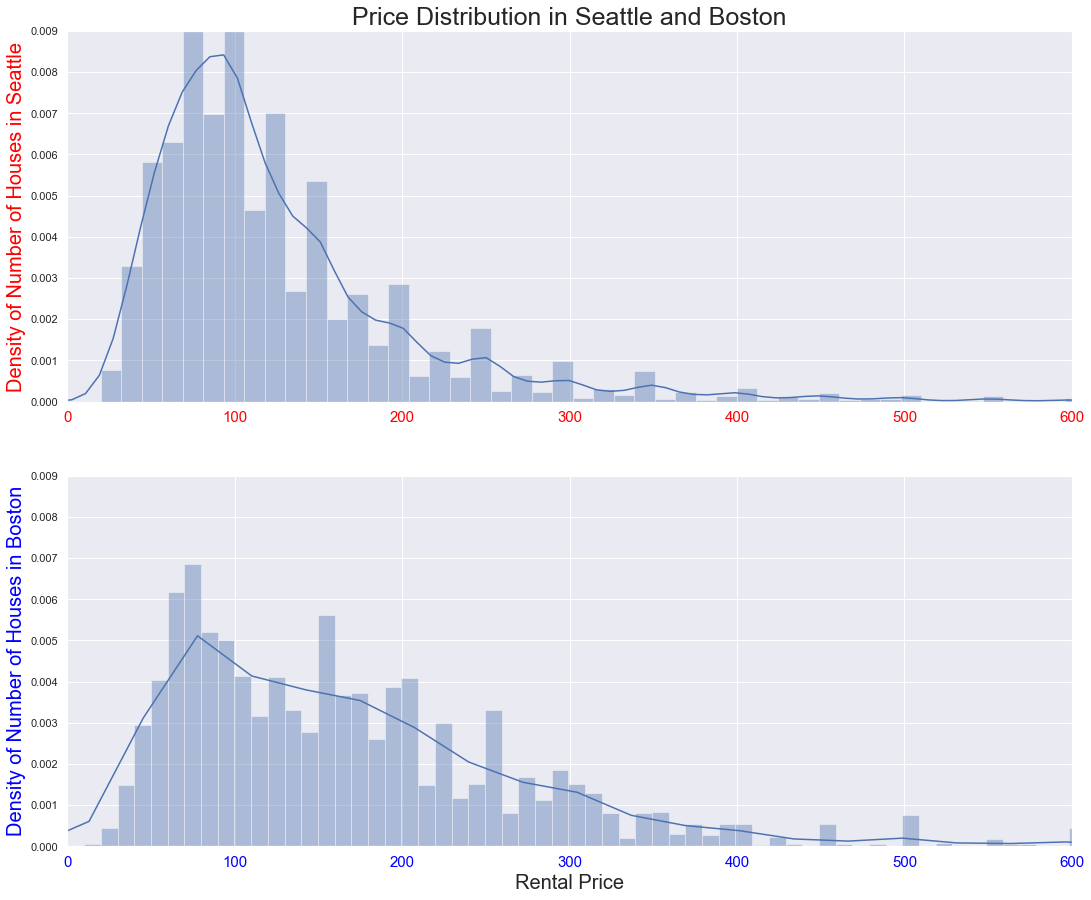

In [50]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,15))

sns.distplot(s_listings.price, bins=80, ax=ax1)
ax1.tick_params(axis='x', labelsize=15, labelcolor = 'red')
ax1.set_ylabel('Density of Number of Houses in Seattle', size=20, color = 'red')
ax1.set_xlabel("")
ax1.set_ylim(0,0.009)
ax1.set_xlim(0,600)
ax1.set_title('Price Distribution in Seattle and Boston', size=25)

sns.distplot(b_listings.price, bins=400, ax=ax2)
ax2.tick_params(axis='x', labelsize=15, labelcolor = 'blue')
ax2.set_ylabel('Density of Number of Houses in Boston', size=20, color = 'blue')
ax2.set_xlabel('Rental Price', size=20)
ax2.set_ylim(0,0.009)
ax2.set_xlim(0,600)

plt.show()

**Observations:**

1) Majority rental price in Seattle is between 30 and 200 with a peak number of rentals around 90.


2) Majority rental price in Boston is between 30 and 300 with a peak number of rentals around 80.


3) The median rental price is higher in Boston than Seattle.

### 2) Neighbourhood

In [19]:
s_top_neighbourhood = s_listings.neighbourhood.value_counts().head(15).index
s_listings_neighbourhood = s_listings[s_listings.neighbourhood.isin(s_top_neighbourhood)]

b_top_neighbourhood = b_listings.neighbourhood.value_counts().head(15).index
b_listings_neighbourhood = b_listings[b_listings.neighbourhood.isin(b_top_neighbourhood)]

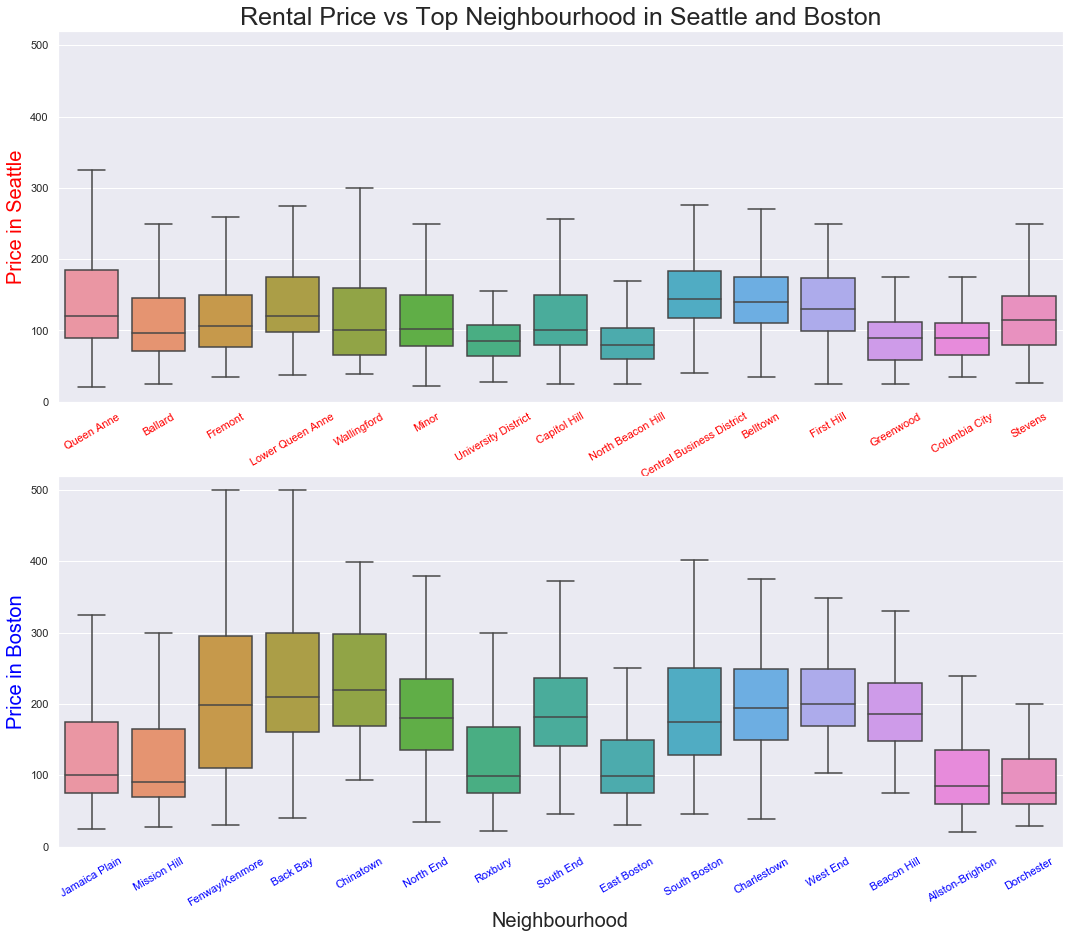

In [52]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,15))

sns.boxplot(x='neighbourhood', y='price', data = s_listings_neighbourhood, ax=ax1, showfliers=False)
ax1.tick_params(axis='x', rotation=30, labelcolor = 'red')
ax1.set_ylabel('Price in Seattle', size=20, color = 'red')
ax1.set_ylim(0,520)
ax1.set_title('Rental Price vs Top Neighbourhood in Seattle and Boston', size=25)

sns.boxplot(x='neighbourhood', y='price', data = b_listings_neighbourhood, ax=ax2, showfliers=False)
ax2.tick_params(axis='x', rotation=30, labelcolor = 'blue')
ax2.set_ylabel('Price in Boston', size=20, color = 'blue')
ax2.set_xlabel('Neighbourhood', size=20)
ax2.set_ylim(0,520)

plt.show()

**Observations:**

1) Central Business District, Belltown, First Hill in Seattle have higher rental price than other neighbourhoods.


2) FenwayKenmore, Back Bay, Chinatown in Boston have higher rental price than other neighbourhoods.


3) The median rental price of Top Seattle Neighbours is below 150, which is lower than most of Boston Top Neighbourhoods.


### 3) Bedrooms

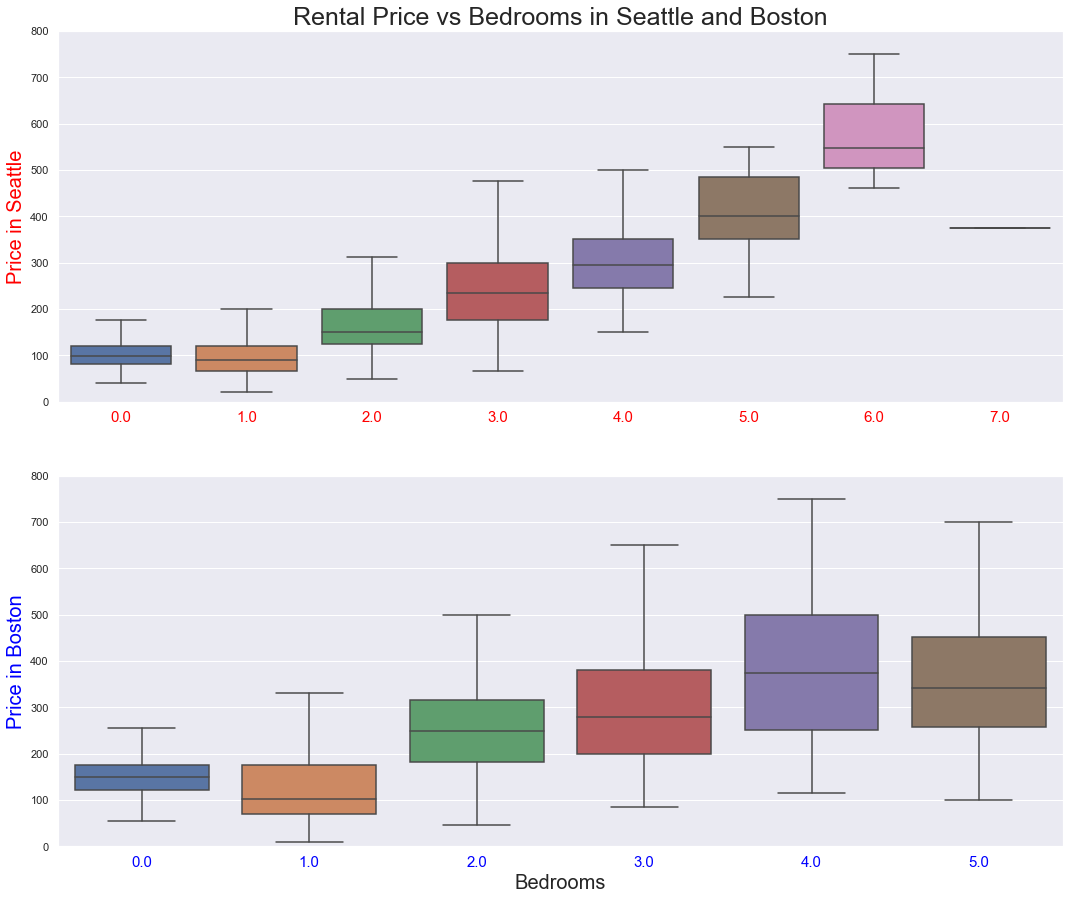

In [53]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,15))

sns.boxplot(x='bedrooms', y='price', data = s_listings, ax=ax1, showfliers=False)
ax1.tick_params(axis='x', labelsize=15, labelcolor = 'red')
ax1.set_ylabel('Price in Seattle', size=20, color = 'red')
ax1.set_xlabel("")
ax1.set_ylim(0,800)
ax1.set_title('Rental Price vs Bedrooms in Seattle and Boston', size=25)

sns.boxplot(x='bedrooms', y='price', data = b_listings, ax=ax2, showfliers=False)
ax2.tick_params(axis='x', labelsize=15, labelcolor = 'blue')
ax2.set_ylabel('Price in Boston', size=20, color = 'blue')
ax2.set_xlabel('Bedrooms', size=20)
ax2.set_ylim(0,800)

plt.show()

**Observations:**

1) In general, the number of bedrooms affect the rental price.


2) In Seattle, the rental price is increasing with more bedrooms.


### 4) Review Scores Rating

In [22]:
s_listings_review = s_listings[['review_scores_rating', 'price']].groupby('review_scores_rating').agg('median').reset_index().sort_values('review_scores_rating')
b_listings_review = b_listings[['review_scores_rating', 'price']].groupby('review_scores_rating').agg('median').reset_index().sort_values('review_scores_rating')

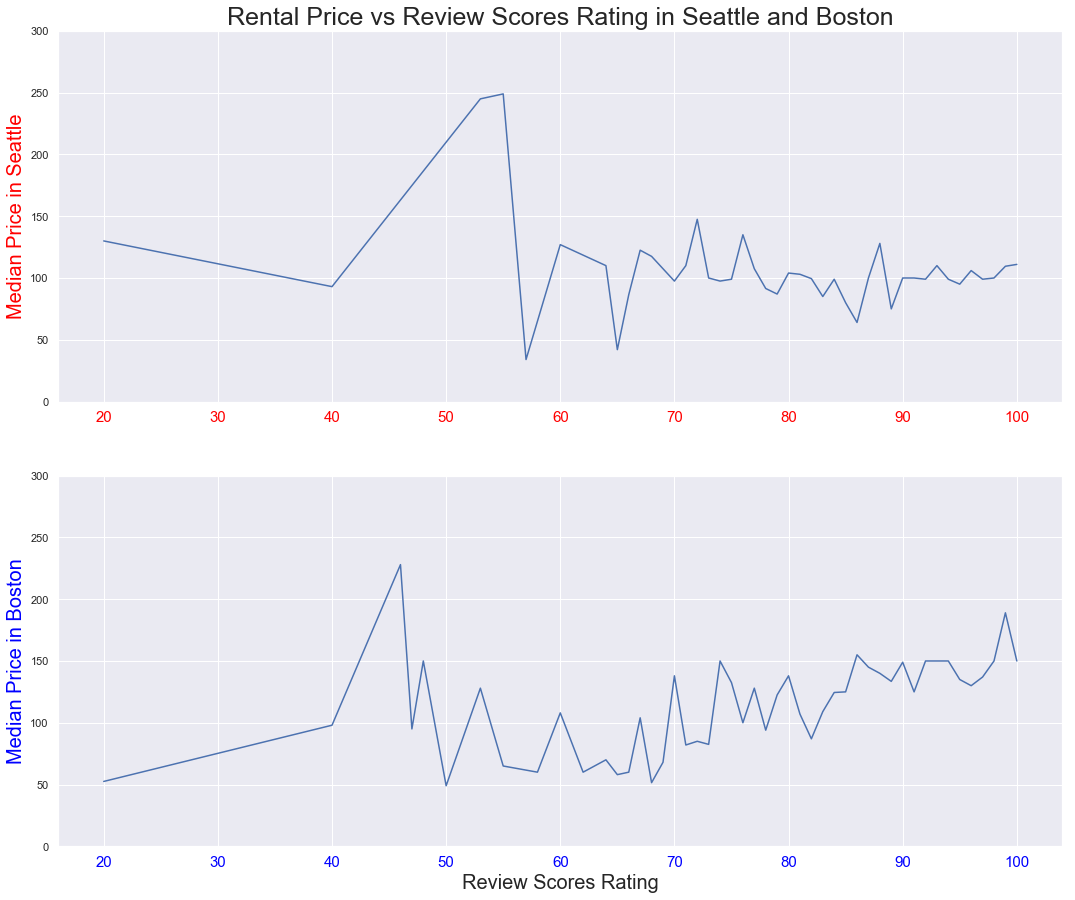

In [55]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,15))

ax1.plot(s_listings_review.review_scores_rating, s_listings_review.price)
#sns.lineplot(x='review_scores_rating', y='price', ax=ax1, data = s_listings)
ax1.tick_params(axis='x', labelsize=15, labelcolor = 'red')
ax1.set_ylabel('Median Price in Seattle', size=20, color = 'red')
ax1.set_xlabel("")
ax1.set_ylim(0,300)
ax1.set_title('Rental Price vs Review Scores Rating in Seattle and Boston', size=25)

ax2.plot(b_listings_review.review_scores_rating, b_listings_review.price)
ax2.tick_params(axis='x', labelsize=15, labelcolor = 'blue')
ax2.set_ylabel('Median Price in Boston', size=20, color = 'blue')
ax2.set_xlabel('Review Scores Rating', size=20)
ax2.set_ylim(0,300)

plt.show()

**Observations:**

1) From the figure, we didn't observe the relation between the review score and the price in both Seattle and Boston.

### 5) Square Feet

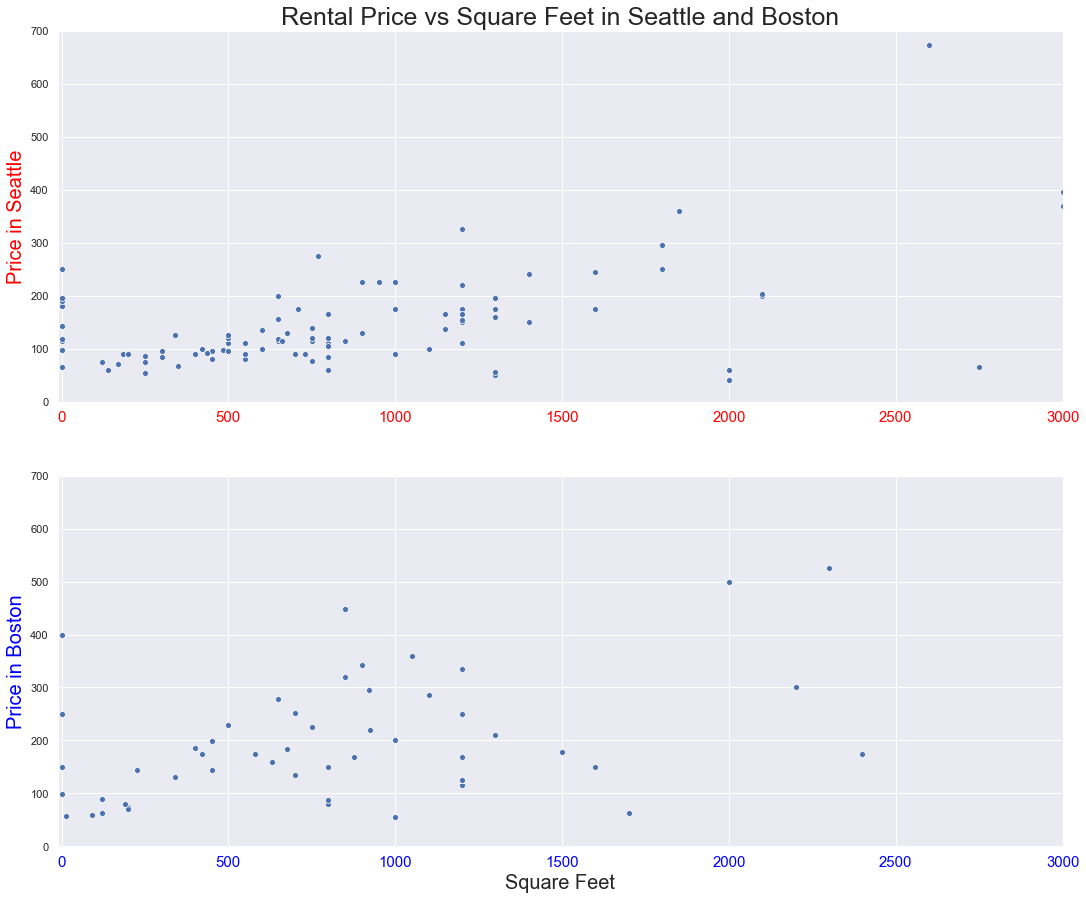

In [86]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,15))

sns.scatterplot(x='square_feet', y='price', ax=ax1, data = s_listings)
ax1.tick_params(axis='x', labelsize=15, labelcolor = 'red')
ax1.set_ylabel('Price in Seattle', size=20, color = 'red')
ax1.set_xlabel("")
ax1.set_ylim(0,700)
ax1.set_xlim(-10,3000)
ax1.set_title('Rental Price vs Square Feet in Seattle and Boston', size=25)

sns.scatterplot(x='square_feet', y='price', ax=ax2, data = b_listings)
ax2.tick_params(axis='x', labelsize=15, labelcolor = 'blue')
ax2.set_ylabel('Price in Boston', size=20, color = 'blue')
ax2.set_xlabel('Square Feet', size=20)
ax2.set_ylim(0,700)
ax2.set_xlim(-10,3000)

plt.show()

**Observations:**

1) In general, the area of the house affect the rental price.


2) In general, the price increases with more square feet of house.

### 6) Property Type

In [25]:
s_listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [26]:
b_listings.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

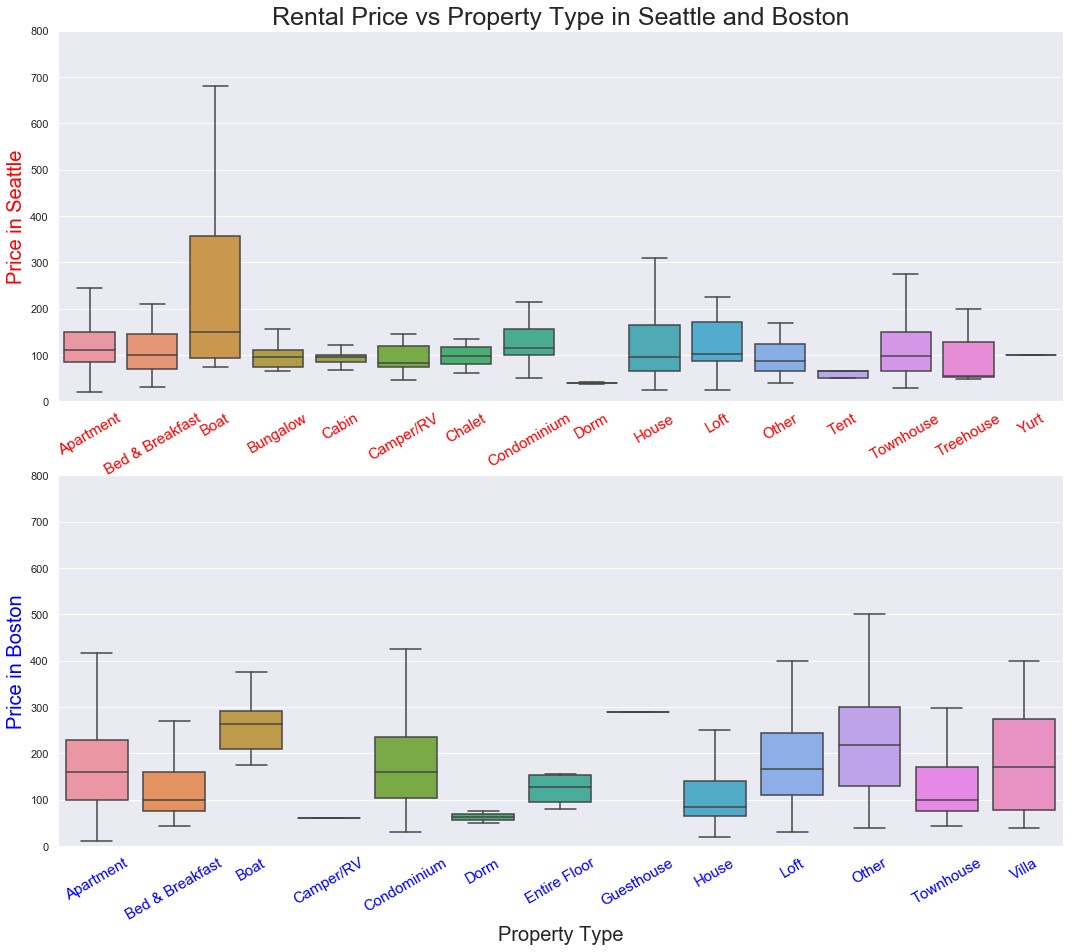

In [57]:
f, (ax1, ax2) = plt.subplots(2,1, figsize = (18,15))

sns.boxplot(x='property_type', y='price', data = s_listings.sort_values('property_type'), ax=ax1, showfliers=False)
ax1.tick_params(axis='x', labelsize=15, labelcolor = 'red')
ax1.set_ylabel('Price in Seattle', size=20, color = 'red')
ax1.set_xlabel("")
ax1.set_ylim(0,800)
ax1.tick_params(axis='x', rotation=30, labelcolor = 'red')
ax1.set_title('Rental Price vs Property Type in Seattle and Boston', size=25)

sns.boxplot(x='property_type', y='price', data = b_listings.sort_values('property_type'), ax=ax2, showfliers=False)
ax2.tick_params(axis='x', labelsize=15, labelcolor = 'blue')
ax2.set_ylabel('Price in Boston', size=20, color = 'blue')
ax2.set_xlabel('Property Type', size=20)
ax2.set_ylim(0,800)
ax2.tick_params(axis='x', rotation=30, labelcolor = 'blue')

plt.show()

**Observations:**

1) House and Apartment are the most popular propery types in Seattle while Apartment is the most popular propery type in Boston.


2) The median price of property type Boat is highest in Both Seattle and Boston.


3) The median price of most property type in Seattle is around 100 while in Boston the median price is above 100.


### Conclusions of Question 1:

From the data exploration, we can see that the location does affect the rental price of Airbnb. Different neighbourhoods show different rental price because of the location in the city. 

Another factor that affect the rental price is the number of bedrooms. More bedrooms, more accommodates, higher rental price.

Property type also affects the rental price, we can see that the median price Boat is highest in Both Seattle and Boston.

Other factor that related to price is the square feet of the house. Larger room shows a higher price in general. 

### Conclusions of Question 2:

The median rental price is higher in Boston than Seattle. Majority rental price in Seattle is between 30 and 200 with a peak rentals around 90, while majority rental price in Boston is between 30 and 300 with a peak rentals around 80.

The median rental price of Top Seattle Neighbours is below 150, which is lower than most of Boston Top Neighbourhoods. Central Business District, Belltown, First Hill in Seattle have higher rental price than other neighbourhoods. FenwayKenmore, Back Bay, Chinatown in Boston have higher rental price than other neighbourhoods.

House and Apartment is the most popular propery types in Seattle while Apartment is the most popular propery type in Boston. The median price of most property type in Seattle is around 100 while in Boston the median price is above 100.

## Question 3: Can we predict the Airbnb rental price using property information?

### I chose Seattle data to build machine learning models to predict the rental price.

### Prepare the data

I chose some columns which are related to properties as the predictors, and price is the target variable.

In [72]:
predictors_numeric = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', \
              'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews']
predictors_object = ['neighbourhood', 'property_type', 'cancellation_policy']
target = ['price']

In [73]:
df = s_listings[predictors_numeric + predictors_object + target]

### Feature Engineering

Check missing value of the data

In [74]:
df.isnull().sum()

host_listings_count      2
accommodates             0
bathrooms               16
bedrooms                 6
beds                     1
guests_included          0
minimum_nights           0
maximum_nights           0
number_of_reviews        0
neighbourhood          416
property_type            1
cancellation_policy      0
price                    0
dtype: int64

 Deal with the missing value in column neighbourhood: fill the missing value with 'Unknown'

In [75]:
df.neighbourhood = df.neighbourhood.fillna('Unknown')

Since there are only 16 rows that contain missing value, I dropped these rows.

In [76]:
df.dropna(inplace=True)

Create dummy variables for categorical variables.

In [77]:
# get neighbourhood dummy variables
df_neighbourhood = pd.get_dummies(df.neighbourhood, prefix='neighbourhood')
df = pd.concat((df, df_neighbourhood), axis=1)
df.drop(['neighbourhood'], axis=1, inplace=True)

In [78]:
# get property_type dummy variables
df_property_type = pd.get_dummies(df.property_type, prefix='property_type')
df = pd.concat((df, df_property_type), axis=1)
df.drop(['property_type'], axis=1, inplace=True)

In [79]:
# get cancellation_policy dummy variables
df_cancellation_policy = pd.get_dummies(df.cancellation_policy, prefix='cancellation_policy')
df = pd.concat((df, df_cancellation_policy), axis=1)
df.drop(['cancellation_policy'], axis=1, inplace=True)

In [80]:
df.shape

(3793, 110)

After feature engineering, the dataset has 3793 rows and 110 variables.

### Model Building

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
X = df.drop(['price'], axis=1)
y = df.price

# split the data to training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### 1) Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
lr = LinearRegression(normalize=True) # fit linear regression model
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test) # predit on test dataset

#### Evaluate the linear regression model

In [85]:
print('Mean square error: %.2f' %np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: %.4f' %r2_score(y_test,y_pred))

Mean square error: 59.32
R2: 0.5482


### 2) Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfr = RandomForestRegressor(max_depth=10, random_state=0) # fit random forest model
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test) # predit on test dataset

#### Evaluate the random forest model

In [47]:
print('Mean square error: %.2f' %np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2: %.4f' %r2_score(y_test,y_pred))

Mean square error: 59.46
R2: 0.5461


### Results: The R2 of linear regression model and random forest models is only 0.55, which is not good. We need to do more feature engineering in future works.